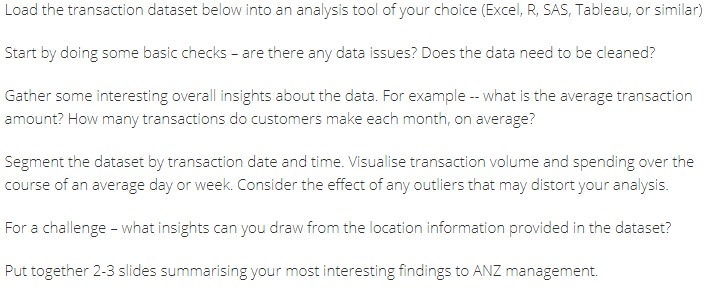

In [3]:
import pandas as pd

In [4]:
# Load the dataset
df = pd.read_excel('ANZ synthesised transaction dataset.xlsx')

In [5]:
# Summary of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [6]:
# Count null values
df.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [7]:
# Average transaction amount
df['amount'].describe()

count    12043.000000
mean       187.933588
std        592.599934
min          0.100000
25%         16.000000
50%         29.000000
75%         53.655000
max       8835.980000
Name: amount, dtype: float64

In [9]:
# Parse dates
df['month'] = df['date'].dt.strftime('%Y-%m')
df['transaction_time'] = pd.to_datetime(df['extraction']).dt.strftime('%H:%M:%S')
df['transaction_hour'] = df['transaction_time'].str[:2]

In [15]:
# How many transactions do customer make per month, on average?
df.groupby(by=['month', 'customer_id'], observed=True).count()['status'].describe()

count    300.000000
mean      40.143333
std       26.231847
min        1.000000
25%       24.000000
50%       35.000000
75%       50.000000
max      206.000000
Name: status, dtype: float64

<AxesSubplot:xlabel='Time of the day (24h)', ylabel='Amount spent on transactions'>

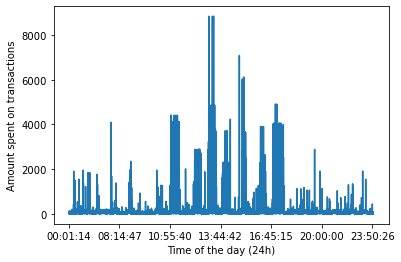

In [16]:
# Daily transaction amounts
df.sort_values('transaction_time').plot(x='transaction_time',
                                        y='amount',
                                        xlabel="Time of the day (24h)",
                                        ylabel="Amount spent on transactions",
                                        legend=False)

<AxesSubplot:xlabel='Time of the day (24h)', ylabel='Number of transactions'>

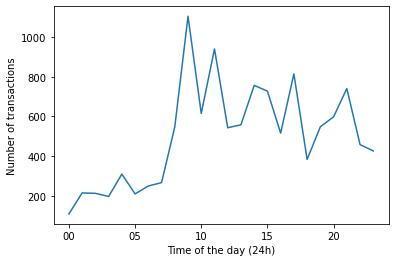

In [17]:
# Daily transactions
df.groupby('transaction_hour').count().reset_index().plot(x='transaction_hour',
                                                          y='status',
                                                          xlabel="Time of the day (24h)",
                                                          ylabel="Number of transactions",
                                                          legend=False)

In [18]:
# Use merchant location data
df.groupby('merchant_state').describe()['amount']

,count,mean,std,min,25%,50%,75%,max
merchant_state,,,,,,,,
ACT,73.0,66.803836,201.821548,4.50,10.9500,22.910,33.4700,1348.47
NSW,2169.0,47.036316,146.858464,0.10,13.3100,22.530,40.7900,4233.00
NT,205.0,44.726293,138.170485,1.71,12.5200,17.810,31.1200,1285.09
QLD,1556.0,34.372397,218.024779,0.10,9.2875,14.700,25.8800,7081.09
SA,415.0,40.425470,87.115715,3.28,14.1500,22.120,35.9050,909.61
TAS,68.0,28.866618,26.782770,7.35,13.7150,22.080,29.0700,133.31
VIC,2131.0,41.099953,130.790309,0.10,14.0350,21.730,35.4750,3680.71
WA,1100.0,30.901873,72.522139,2.05,11.4300,18.365,28.7725,1692.56


In [ ]:
print('Number of different values in each column:')
for c in df.columns:
    print(c, len(df[c].value_counts()))

In [ ]:
# 'transaction_id' may be a good candidate for row names
df.set_index('transaction_id').head()